In [12]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.0f}'.format

plt.style.use('fivethirtyeight')

In [13]:
df_raw = pd.read_excel('meritech_table.xlsx')
pd.set_option('display.max_columns',len(df_raw.columns))
pd.set_option('display.max_rows', 100)

In [14]:
df_raw

,Name,Price,% Price 3 Month,% Price 12 Month,Equity Value,Enterprise Value,EV / Implied ARR,EV / NTM Revenue,Growth Adj. EV / NTM Revenue,Implied ARR,Net New ARR,LTM Revenue,Implied ARR % YoY,LTM Revenue % YoY,NTM Revenue % YoY,GM % (LTM),S&M (% LTM),R&D (% LTM),G&A (% LTM),Opex (% LTM),FCF (% LTM),Rule of 40,Magic Number,Payback Period,Implied Avg ACV,Implied ARR/FTE,Annualized OpEx/FTE,Net Dollar Retention,Mult. Return since IPO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adobe,286,0,0,"132,831","131,194",7.4x,7,0.59x,"17,732",188,"17,191",0,0,0,1,0,0,0,0,0,1,0,83,0,633,279,0,0
4,Alkami,15,0,0,"1,460","1,331",6.6x,6,0.20x,202,23,178,0,0,0,1,0,0,0,1,0,0,3,7,522,254,169,1,0.5x
5,Alteryx,52,0,0,"3,572","3,936",5.4x,5,0.14x,722,91,636,0,0,0,1,1,0,0,1,0,0,1,15,87,278,298,1,3.7x
6,*Amplitude,15,0,1,"1,861","1,551",6.7x,6,0.20x,233,20,206,0,1,0,1,0,0,0,1,0,0,1,20,127,323,276,1,0.4x
7,AppFolio,113,0,0,"4,022","3,854",8.2x,8,0.34x,470,49,414,0,0,0,1,0,0,0,1,0,0,2,10,26,239,132,0,9.4x
8,Asana,22,0,1,"4,928","4,721",8.7x,8,0.23x,540,57,468,1,1,0,1,1,0,0,1,0,0,1,20,4,269,349,1,1.1x
9,Atlassian,220,0,0,"56,161","55,815",18.4x,16,0.54x,"3,039",77,"2,803",0,0,0,1,0,0,0,1,0,1,1,22,13,345,244,0,10.5x


In [15]:
df_raw['% Price 3 Month'] = df_raw['% Price 3 Month']* 100
df_raw['% Price 12 Month'] = df_raw['% Price 12 Month']*100
df_raw['Implied ARR % YoY'] = df_raw['Implied ARR % YoY']*100
df_raw['LTM Revenue % YoY'] = df_raw['LTM Revenue % YoY'] *100
df_raw['NTM Revenue % YoY'] = df_raw['NTM Revenue % YoY']*100
df_raw['GM % (LTM)'] = df_raw['GM % (LTM)']*100
df_raw['S&M (% LTM)'] = df_raw['S&M (% LTM)']*100
df_raw['R&D (% LTM)'] = df_raw['R&D (% LTM)']*100
df_raw['G&A (% LTM)'] = df_raw['G&A (% LTM)']*100
df_raw['Opex (% LTM)'] = df_raw['Opex (% LTM)']*100
df_raw['FCF (% LTM)'] = df_raw['FCF (% LTM)']*100
df_raw['Rule of 40'] = df_raw['Rule of 40']*100
df_raw['Net Dollar Retention'] = df_raw['Net Dollar Retention']*100

In [16]:
df_raw.head(2)

,Name,Price,% Price 3 Month,% Price 12 Month,Equity Value,Enterprise Value,EV / Implied ARR,EV / NTM Revenue,Growth Adj. EV / NTM Revenue,Implied ARR,Net New ARR,LTM Revenue,Implied ARR % YoY,LTM Revenue % YoY,NTM Revenue % YoY,GM % (LTM),S&M (% LTM),R&D (% LTM),G&A (% LTM),Opex (% LTM),FCF (% LTM),Rule of 40,Magic Number,Payback Period,Implied Avg ACV,Implied ARR/FTE,Annualized OpEx/FTE,Net Dollar Retention,Mult. Return since IPO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df_raw[3:]

In [18]:
df['Cost of Revenue'] = 100-df_raw['GM % (LTM)']
df

<ipython-input-18-8470070ff9e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cost of Revenue'] = 100-df_raw['GM % (LTM)']


,Name,Price,% Price 3 Month,% Price 12 Month,Equity Value,Enterprise Value,EV / Implied ARR,EV / NTM Revenue,Growth Adj. EV / NTM Revenue,Implied ARR,Net New ARR,LTM Revenue,Implied ARR % YoY,LTM Revenue % YoY,...,S&M (% LTM),R&D (% LTM),G&A (% LTM),Opex (% LTM),FCF (% LTM),Rule of 40,Magic Number,Payback Period,Implied Avg ACV,Implied ARR/FTE,Annualized OpEx/FTE,Net Dollar Retention,Mult. Return since IPO,Cost of Revenue
3,Adobe,286,27,50,"132,831","131,194",7.4x,7,0.59x,"17,732",188,"17,191",13,14,...,26,13,6,44,41,54,0,83,0,633,279,0,0,12
4,Alkami,15,6,39,"1,460","1,331",6.6x,6,0.20x,202,23,178,38,34,...,17,28,23,68,21,17,3,7,522,254,169,115,0.5x,43
5,Alteryx,52,1,28,"3,572","3,936",5.4x,5,0.14x,722,91,636,50,20,...,59,21,19,100,7,44,1,15,87,278,298,120,3.7x,12
6,*Amplitude,15,12,70,"1,861","1,551",6.7x,6,0.20x,233,20,206,48,60,...,48,22,24,95,13,35,1,20,127,323,276,126,0.4x,28
7,AppFolio,113,12,12,"4,022","3,854",8.2x,8,0.34x,470,49,414,32,28,...,21,19,14,54,4,36,2,10,26,239,132,0,9.4x,40
8,Asana,22,9,79,"4,928","4,721",8.7x,8,0.23x,540,57,468,51,59,...,69,37,29,134,35,16,1,20,4,269,349,120,1.1x,10
9,Atlassian,220,3,44,"56,161","55,815",18.4x,16,0.54x,"3,039",77,"2,803",36,34,...,16,34,13,64,29,65,1,22,13,345,244,0,10.5x,15
10,Avalara,93,6,44,"8,324","7,823",9.4x,8,0.40x,834,16,789,23,33,...,40,20,14,75,2,25,0,80,41,175,129,113,3.9x,28
11,BigCommerce,14,27,73,"1,030","1,008",3.7x,3,0.18x,273,9,258,39,45,...,44,27,22,93,25,14,0,54,4,194,182,116,0.6x,23
12,Bill.com,129,1,53,"13,953","13,021",16.3x,13,0.26x,801,133,642,156,169,...,38,26,25,89,4,152,2,7,5,353,272,131,5.9x,16


In [19]:
df_filter = df[['Name','Cost of Revenue','S&M (% LTM)','R&D (% LTM)','G&A (% LTM)', ]]
df_filter = df_filter.set_index('Name')
df_filter['EBIT'] = 100-(df_filter['Cost of Revenue'] + df_filter['S&M (% LTM)'] + df_filter['R&D (% LTM)']+df_filter['G&A (% LTM)'])



In [20]:
df_filter = df_filter.sort_values(by=['EBIT'], ascending=True)
df_filter = df_filter[['EBIT','Cost of Revenue', 'S&M (% LTM)','R&D (% LTM)','G&A (% LTM)']]

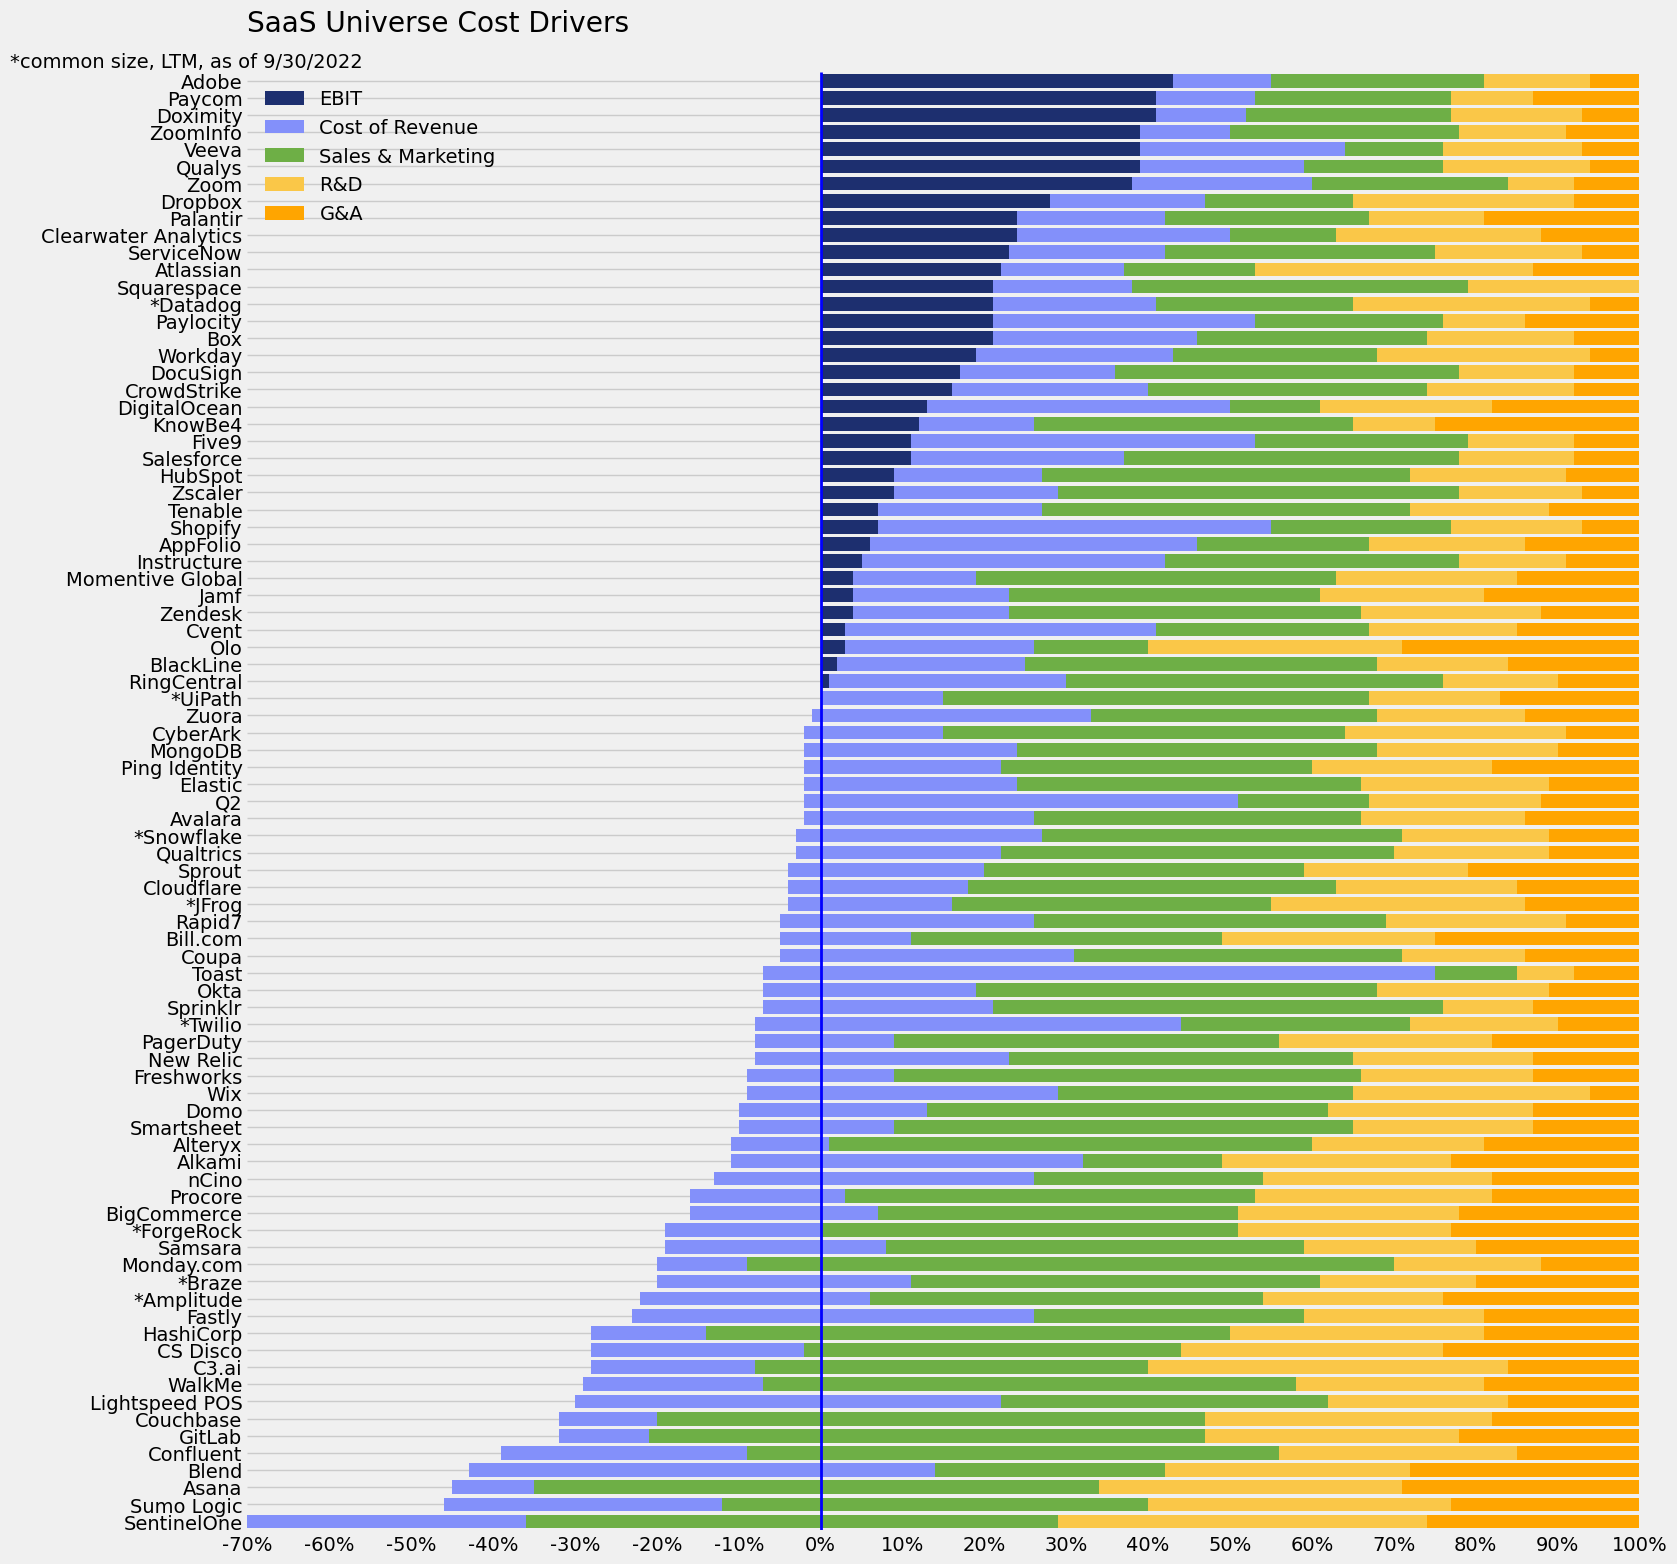

In [23]:
# variables
labels = ['EBIT','Cost of Revenue', 'Sales & Marketing', 'R&D', 'G&A']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', 'orange']
title = 'SaaS Universe Cost Drivers\n'
subtitle = '*common size, LTM, as of 9/30/2022'

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(16, 18))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(-99, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, loc='upper left', ncol=1, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(-70,110,10)
    xlabels = ['{}%'.format(i) for i in np.arange(-70,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.axvline(0,color='b',linestyle='-',lw=2)
    plt.savefig('SaaS_Costs.png',bbox_inches="tight")
    plt.show()
    
    
plot_stackedbar_p(df_filter, labels, colors, title, subtitle)
